<a href="https://colab.research.google.com/github/harsh111111111/House-Price-Prediction/blob/main/Boston_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data load

In [3]:
import pandas as pd 
import pickle 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from pandas import read_csv
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = read_csv('/content/housing.csv', header=None, delimiter=r"\s+", names=column_names)
print(df.head(5))

      CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  MEDV
0  0.00632  18.0   2.31     0  0.538  ...  296.0     15.3  396.90   4.98  24.0
1  0.02731   0.0   7.07     0  0.469  ...  242.0     17.8  396.90   9.14  21.6
2  0.02729   0.0   7.07     0  0.469  ...  242.0     17.8  392.83   4.03  34.7
3  0.03237   0.0   2.18     0  0.458  ...  222.0     18.7  394.63   2.94  33.4
4  0.06905   0.0   2.18     0  0.458  ...  222.0     18.7  396.90   5.33  36.2

[5 rows x 14 columns]


In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [7]:
df.shape

(506, 14)

EDA

In [8]:
average = df['MEDV'].mean()
print(average)

22.532806324110698


In [9]:
average = df['AGE'].mean()
print(average)

68.57490118577078


In [10]:
max=df['AGE'].max()
print(max)

100.0


In [11]:
max=df['MEDV'].max()
print(max)

50.0


In [12]:
min=df['MEDV'].min
print(min)

<bound method Series.min of 0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64>


In [13]:

df = pd.DataFrame(df, columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [14]:
minvalue = df['MEDV'].min()
minvalue

5.0

In [15]:
minvalue_series = df.min(axis = 1)
  
minvalue_series

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
501    0.0
502    0.0
503    0.0
504    0.0
505    0.0
Length: 506, dtype: float64

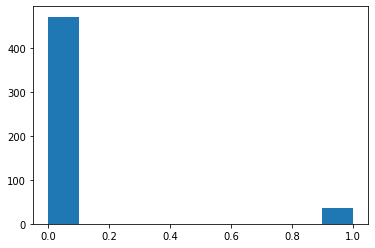

In [16]:
plt.hist(df.CHAS)
plt.show()

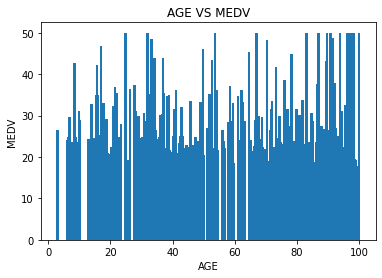

In [17]:
plt.bar(df.AGE,df.MEDV)
plt.title('AGE VS MEDV')
plt.xlabel('AGE')
plt.ylabel('MEDV')
plt.show()

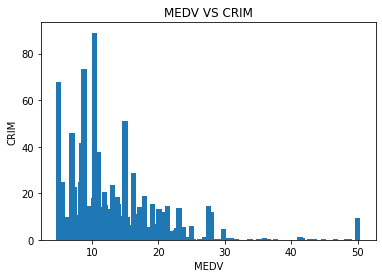

In [18]:
plt.bar(df.MEDV,df.CRIM)
plt.title('MEDV VS CRIM')
plt.xlabel('MEDV')
plt.ylabel('CRIM')
plt.show()

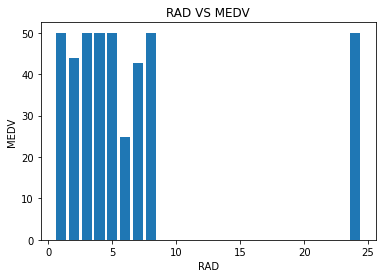

In [19]:
plt.bar(df.RAD,df.MEDV)
plt.title('RAD VS MEDV')
plt.xlabel('RAD')
plt.ylabel('MEDV')
plt.show()

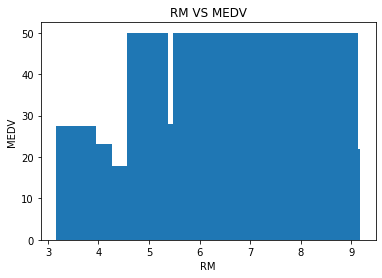

In [20]:
plt.bar(df.RM,df.MEDV)
plt.title('RM VS MEDV')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.show()

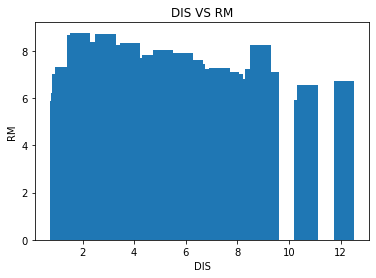

In [21]:
plt.bar(df.DIS,df.RM)
plt.title('DIS VS RM')
plt.xlabel('DIS')
plt.ylabel('RM')
plt.show()

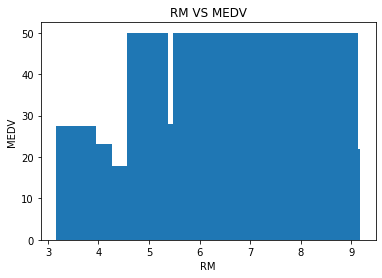

In [22]:

plt.bar(df.RM,df.MEDV)
plt.title('RM VS MEDV')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.show()

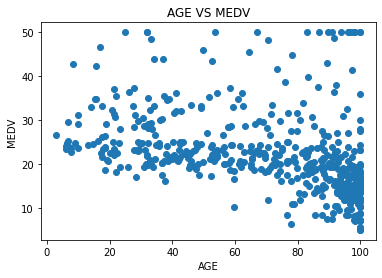

In [23]:
plt.scatter(df.AGE,df.MEDV)
plt.title('AGE VS MEDV')
plt.xlabel('AGE')
plt.ylabel('MEDV')
plt.show()

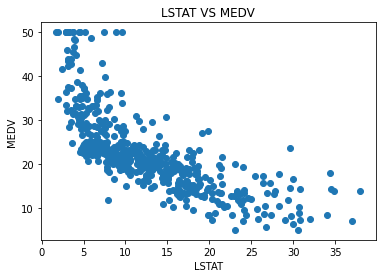

In [24]:
plt.scatter(df.LSTAT,df.MEDV)
plt.title('LSTAT VS MEDV')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()

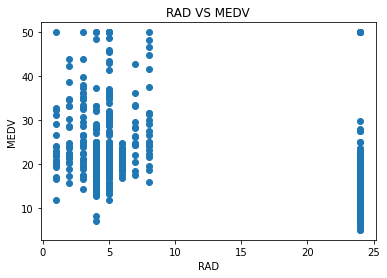

In [25]:
plt.scatter(df.RAD,df.MEDV)
plt.title('RAD VS MEDV')
plt.xlabel('RAD')
plt.ylabel('MEDV')
plt.show()

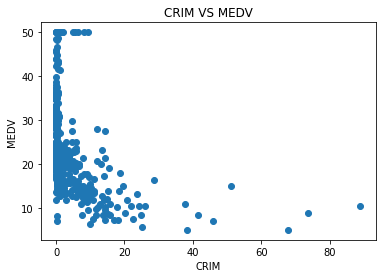

In [26]:
plt.scatter(df.CRIM,df.MEDV)
plt.title('CRIM VS MEDV')
plt.xlabel('CRIM')
plt.ylabel('MEDV')
plt.show()

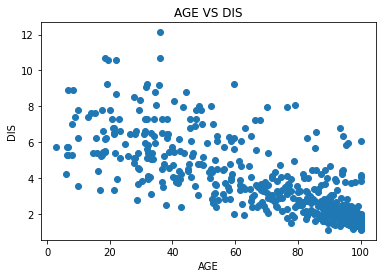

In [27]:
plt.scatter(df.AGE,df.DIS)
plt.title('AGE VS DIS')
plt.xlabel('AGE')
plt.ylabel('DIS')
plt.show()

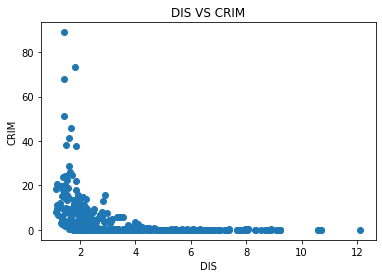

In [28]:
plt.scatter(df.DIS,df.CRIM)
plt.title('DIS VS CRIM')
plt.xlabel('DIS')
plt.ylabel('CRIM')
plt.show()

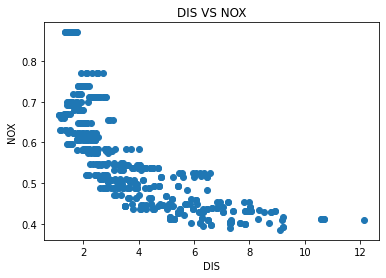

In [29]:
plt.scatter(df.DIS,df.NOX)
plt.title('DIS VS NOX')
plt.xlabel('DIS')
plt.ylabel('NOX')
plt.show()

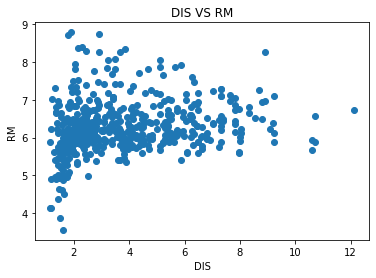

In [30]:
plt.scatter(df.DIS,df.RM)
plt.title('DIS VS RM')
plt.xlabel('DIS')
plt.ylabel('RM')
plt.show()

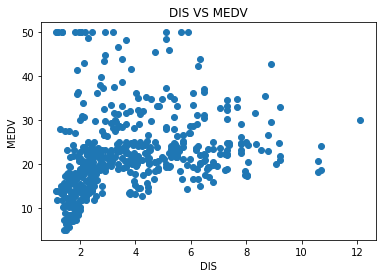

In [31]:
plt.scatter(df.DIS,df.MEDV)
plt.title('DIS VS MEDV')
plt.xlabel('DIS')
plt.ylabel('MEDV')
plt.show()

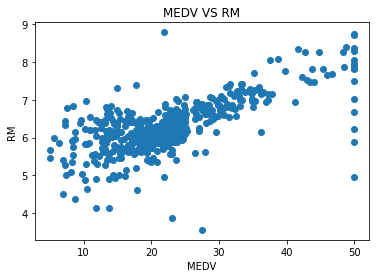

In [32]:
plt.scatter(df.MEDV,df.RM)
plt.title('MEDV VS RM')
plt.xlabel('MEDV')
plt.ylabel('RM')
plt.show()

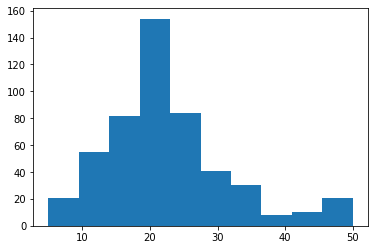

In [33]:
plt.hist(df.MEDV)
plt.show()

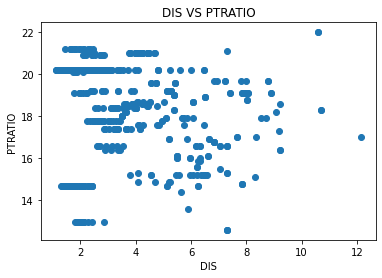

In [34]:
plt.scatter(df.DIS,df.PTRATIO)
plt.title('DIS VS PTRATIO')
plt.xlabel('DIS')
plt.ylabel('PTRATIO')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


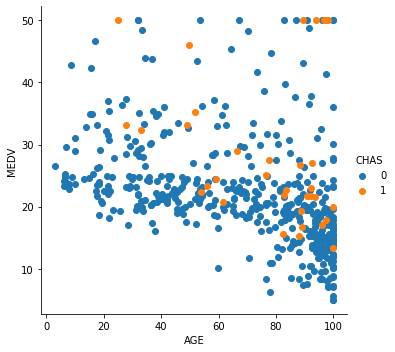

In [35]:
sns.FacetGrid(df,hue="CHAS",size=5).map(plt.scatter,"AGE","MEDV").add_legend();
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


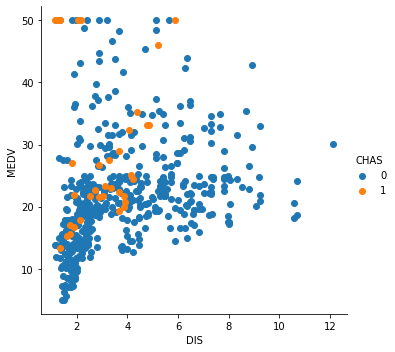

In [36]:
sns.FacetGrid(df,hue="CHAS",size=5).map(plt.scatter,"DIS","MEDV").add_legend();
plt.show()

In [37]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [38]:
x= df.drop("MEDV",axis=1)
y=df["MEDV"]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


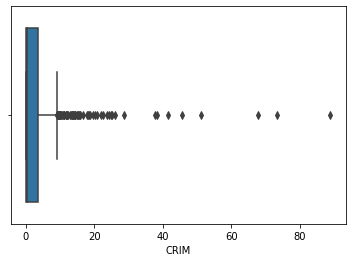

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


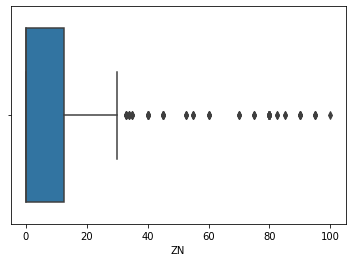

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


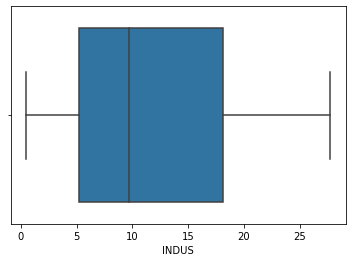

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


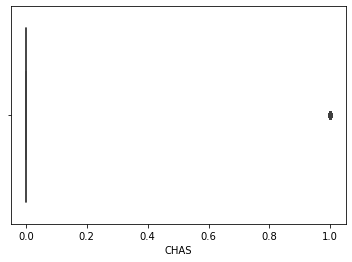

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


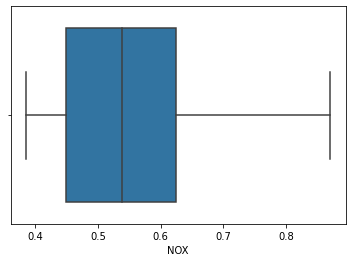

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


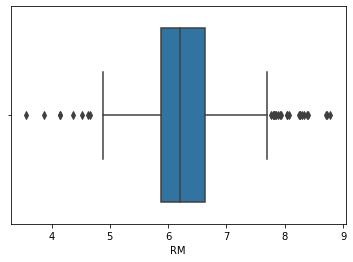

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


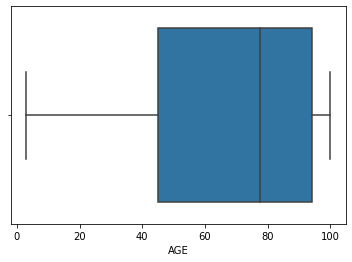

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


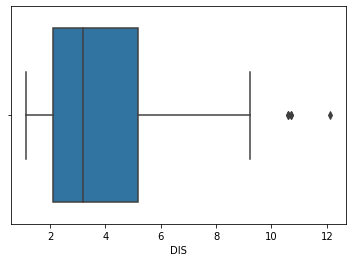

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


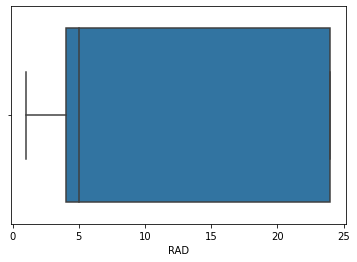

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


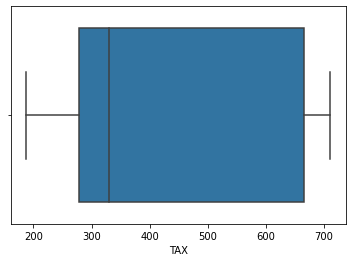

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


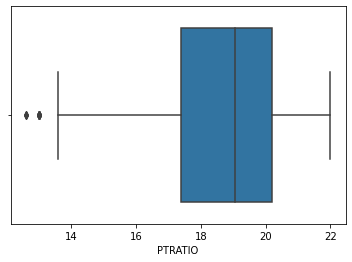

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


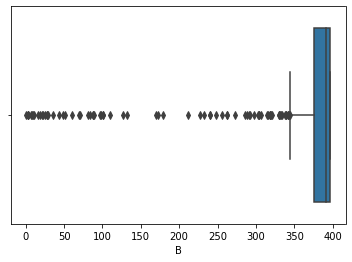

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


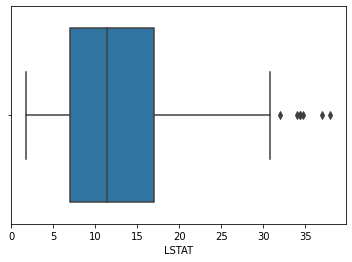

In [39]:
for col in x.columns:
    sns.boxplot(x[col])
    plt.show()

In [40]:
for col in x.columns:
    IQR = x[col].quantile(0.75)-x[col].quantile(0.25)
    upper_bridge = x[col].quantile(0.75)+(IQR*1.5)
    x.loc[x[col]>=upper_bridge, col]=upper_bridge

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


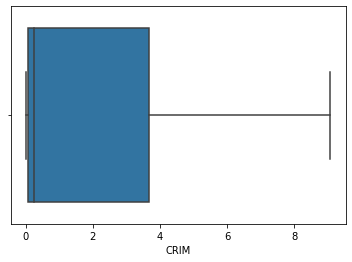

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


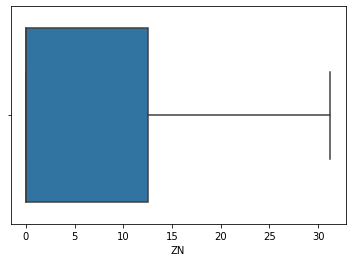

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


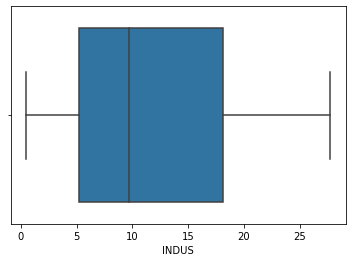

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


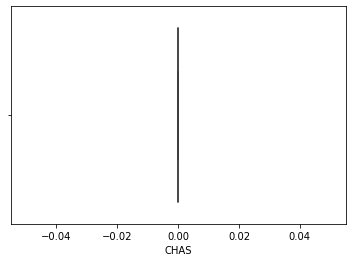

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


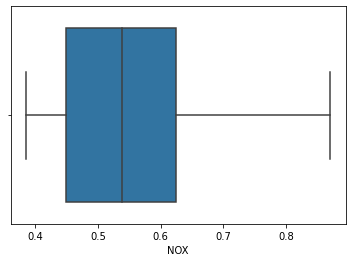

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


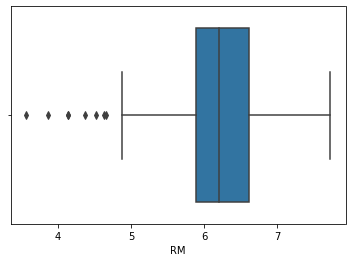

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


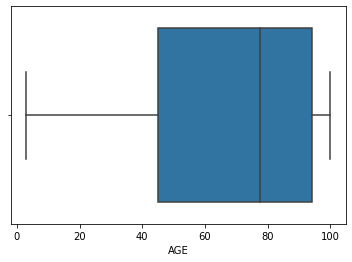

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


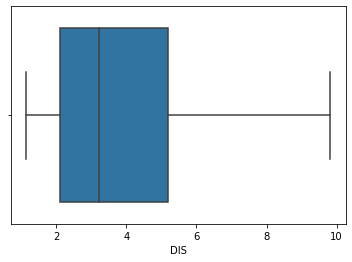

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


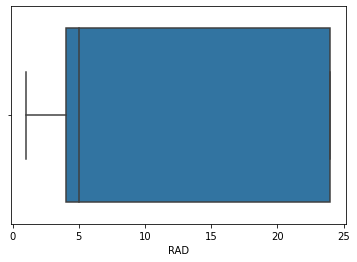

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


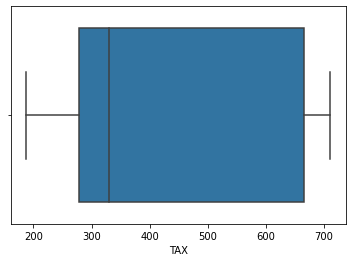

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


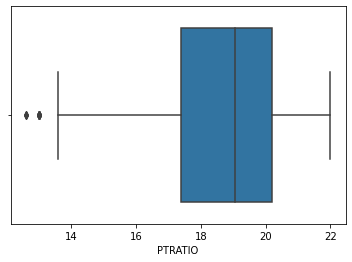

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


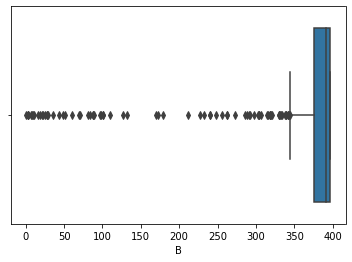

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


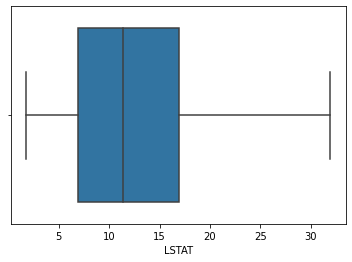

In [41]:
for col in x.columns:
    sns.boxplot(x[col])
    plt.show()

In [42]:
for col in x.columns:
    IQR = x[col].quantile(0.75)-x[col].quantile(0.25)
    lower_bridge = x[col].quantile(0.25)-(IQR*1.5)
    x.loc[x[col]<=lower_bridge, col]=lower_bridge

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


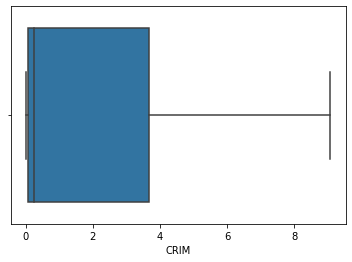

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


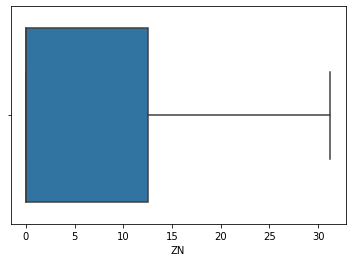

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


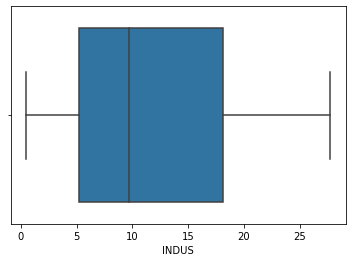

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


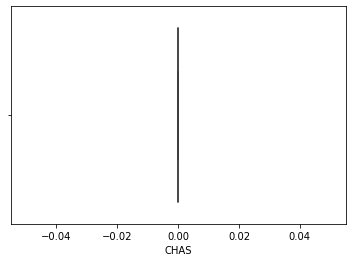

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


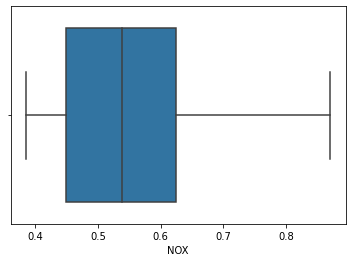

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


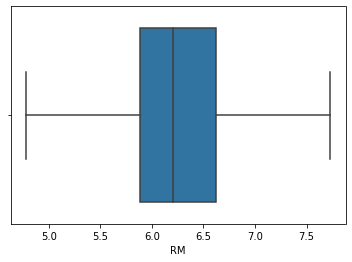

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


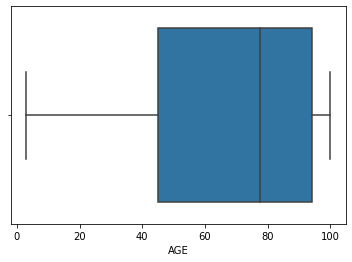

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


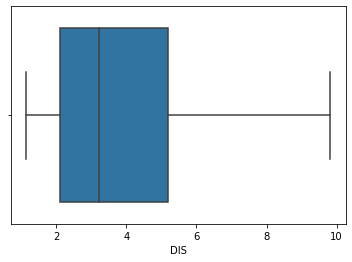

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


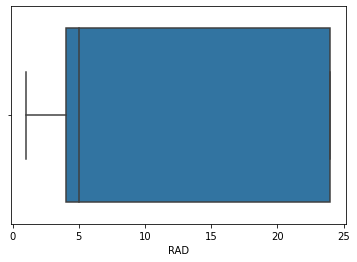

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


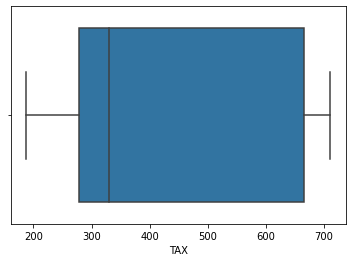

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


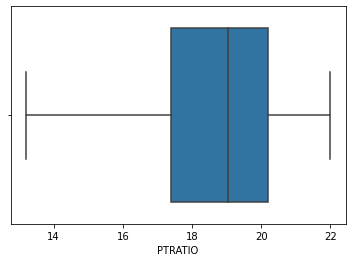

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


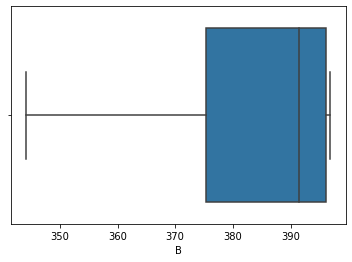

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


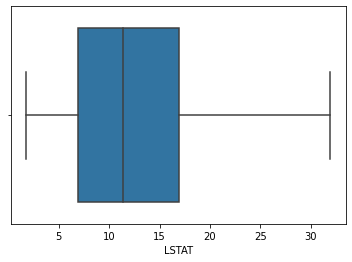

In [43]:
for col in x.columns:
    sns.boxplot(x[col])
    plt.show()

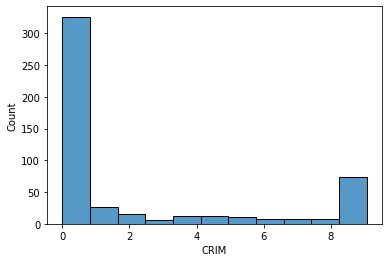

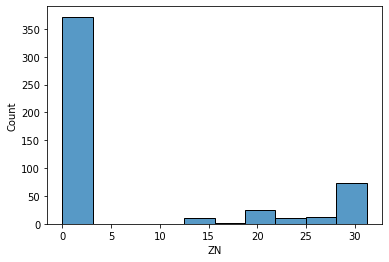

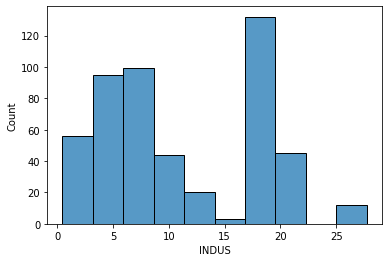

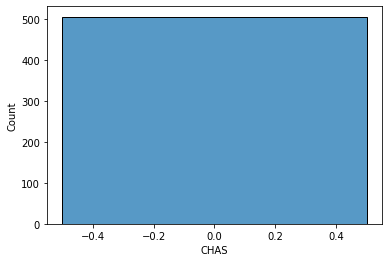

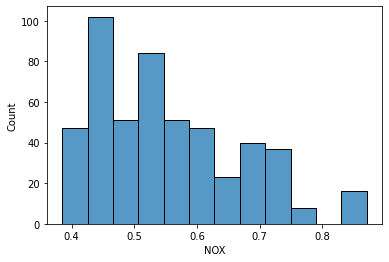

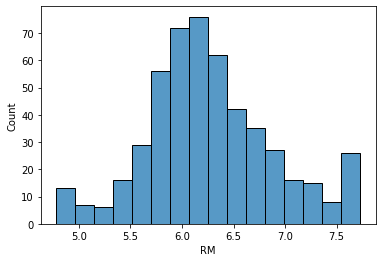

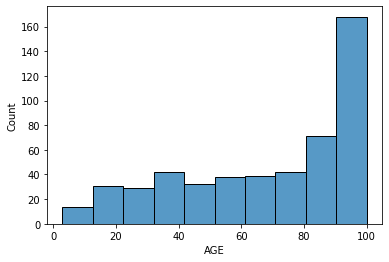

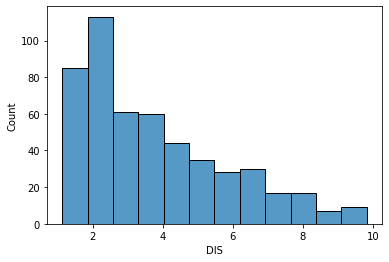

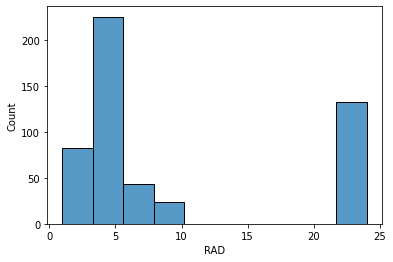

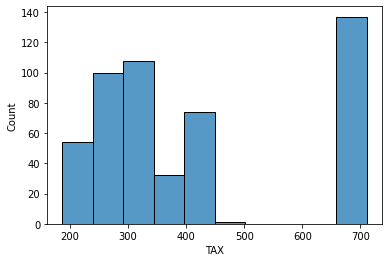

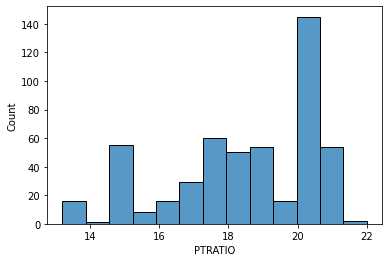

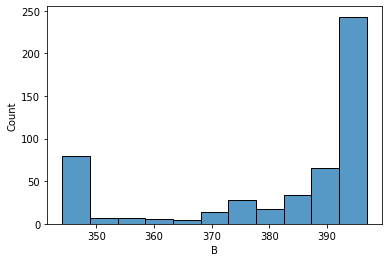

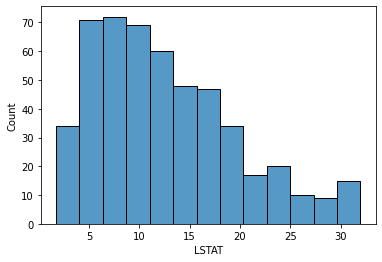

In [44]:
for col in x.columns:
    sns.histplot(x[col])
    plt.show()

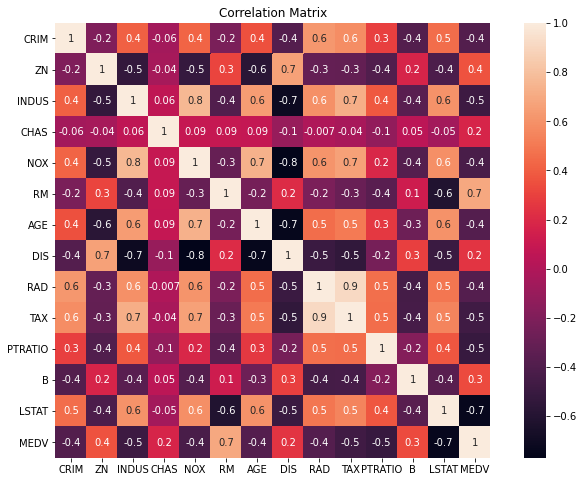

In [45]:
  f = plt.figure(figsize=(12, 8))
plt.title('Correlation Matrix')
sns.heatmap(df.corr(), annot = True, fmt='.1g',square=True)


Feature engineering

In [46]:
df.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


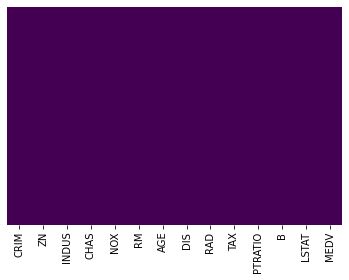

In [47]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Feature selection 

In [48]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [49]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [50]:
df.drop(['CHAS'],axis=1,inplace=True)

Split Dataset into train and test

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)

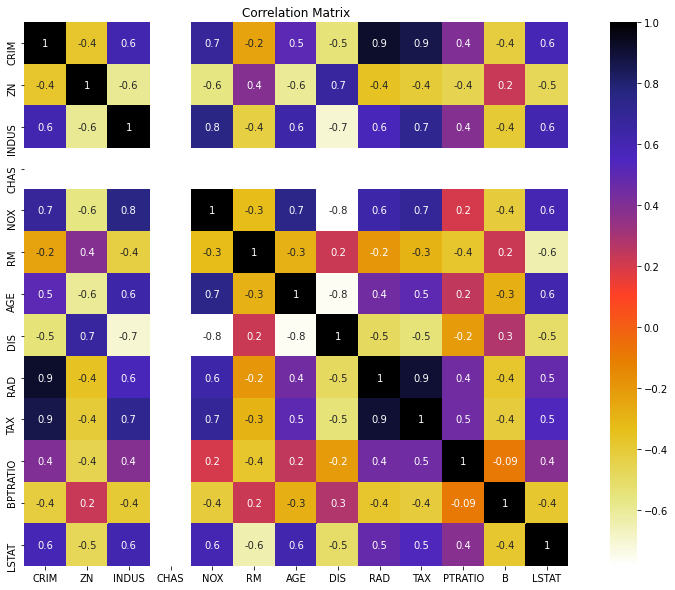

In [52]:
 f= plt.figure(figsize=(15, 10))
plt.title('Correlation Matrix')
cor = x_train.corr()
sns.heatmap(cor, annot = True,cmap=plt.cm.CMRmap_r,  fmt='.1g',square=True)
plt.show()

In [53]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [54]:
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i] 
                col_corr.add(colname)
    return col_corr

In [55]:
corr_feature = correlation(x_train,0.7)
len(set(corr_feature))

4

In [56]:
corr_feature

{'AGE', 'NOX', 'RAD', 'TAX'}

In [57]:
x_train.drop(['NOX','RAD','TAX'],axis=1,inplace=True)
x_test.drop(['NOX','RAD','TAX'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [58]:
x_test

,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,PTRATIO,B,LSTAT
329,0.067240,0.00,3.24,0.0,6.333,17.2,5.2146,16.9,375.21000,7.34
371,9.069639,0.00,18.10,0.0,6.216,100.0,1.1691,20.2,366.15000,9.53
219,0.114250,0.00,13.89,0.0,6.373,92.4,3.3633,16.4,393.74000,10.50
403,9.069639,0.00,18.10,0.0,5.349,96.0,1.7028,20.2,396.90000,19.77
78,0.056460,0.00,12.83,0.0,6.232,53.7,5.0141,18.7,386.40000,12.34
...,...,...,...,...,...,...,...,...,...,...
56,0.020550,31.25,0.74,0.0,6.383,35.7,9.1876,17.3,396.90000,5.77
455,4.752370,0.00,18.10,0.0,6.525,86.5,2.4358,20.2,344.10625,18.13
60,0.149320,25.00,5.13,0.0,5.741,66.2,7.2254,19.7,395.11000,13.15
213,0.140520,0.00,10.59,0.0,6.375,32.3,3.9454,18.6,385.81000,9.38


feature selection

In [59]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=506, n_features=9, n_informative=5, random_state=1)

print(X.shape, y.shape)

(506, 9) (506,)


Feature: 0, Score: 0.04988
Feature: 1, Score: 0.00136
Feature: 2, Score: 0.01461
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.41226
Feature: 5, Score: 0.01635
Feature: 6, Score: 0.05158
Feature: 7, Score: 0.02574
Feature: 8, Score: 0.01057
Feature: 9, Score: 0.41764


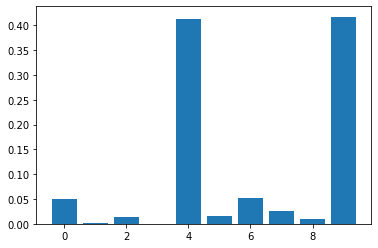

In [60]:
# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# define dataset
x, y = make_regression(n_samples=506, n_features=9, n_informative=5, random_state=1)
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(x_train,y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [61]:
df.drop(['ZN','INDUS','AGE','PTRATIO','B','NOX','RAD','TAX'],axis=1,inplace=True)

In [62]:
df.head()

,CRIM,RM,DIS,LSTAT,MEDV
0,0.00632,6.575,4.0900,4.98,24.0
1,0.02731,6.421,4.9671,9.14,21.6
2,0.02729,7.185,4.9671,4.03,34.7
3,0.03237,6.998,6.0622,2.94,33.4
4,0.06905,7.147,6.0622,5.33,36.2


In [63]:
x= df.drop("MEDV",axis=1)
y=df["MEDV"]

In [64]:
from sklearn.preprocessing import MinMaxScaler
mms= MinMaxScaler()
x = pd.DataFrame(mms.fit_transform(x))
x.head()

,0,1,2,3
0,0.000000,0.577505,0.269203,0.089680
1,0.000236,0.547998,0.348962,0.204470
2,0.000236,0.694386,0.348962,0.063466
3,0.000293,0.658555,0.448545,0.033389
4,0.000705,0.687105,0.448545,0.099338


In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=10)

Train the model 

In [66]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
y_test

305    28.4
193    31.1
65     23.5
349    26.6
151    19.6
       ... 
208    24.4
174    22.6
108    19.8
242    22.2
102    18.6
Name: MEDV, Length: 102, dtype: float64

In [68]:
y_pred = regressor.predict(x_test)

In [69]:
y_pred

array([27.1526302 , 29.09313231, 26.891681  , 27.65581775, 19.59706929,
       21.06564611, 36.59378593, 16.94619659, 20.49241538, 37.48153695,
       22.09126538, 27.57733085, 25.15450977, 31.84813862, 30.57095794,
       37.60310745, 27.8700036 , 19.40126033, 23.61321488, 21.40520576,
       32.29030983, 19.58712138, 25.11709635, 27.44064426, 32.10328797,
       22.23446737, 16.59879472, 19.89558468, 34.76344505, -1.00847782,
       27.31697314, 31.37976301, 25.62157084, 25.08965374, 19.66170351,
       20.17557054,  5.5392909 , 32.25481419, 27.35933405, 26.8982319 ,
       35.30240602, 28.0668805 , 17.8696767 , 28.69139253, 16.35668439,
       27.40660198, 21.93721454, 21.28963534, 35.2981071 , 18.29105196,
       22.14127104, 19.04272073, 22.23291819, 36.09719093, 30.18817476,
       29.89542446, 20.33530211, 22.21210356, 17.47585478, 25.404058  ,
       24.00739493, 23.39918688, 39.24290466, 39.75515615, 29.49689809,
       19.33394536, 26.04710935,  0.3528751 , 29.48161464, 34.96

Text(0.5, 1.0, 'Linear Regression Model')

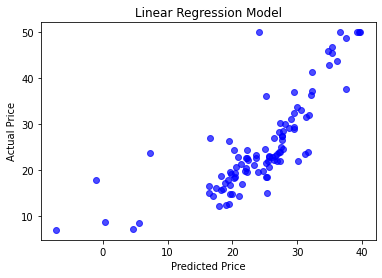

In [70]:
# alpha helps to show overlapping data
plt.scatter(y_pred, y_test, alpha = 0.7, color = 'b')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')

In [71]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import math
import sklearn.metrics as metrics 

def print_evaluate(y_test,y_pred1):  
    mae = metrics.mean_absolute_error(y_test,y_pred1)
    mse = metrics.mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred1))
    r2_square = metrics.r2_score(y_test,y_pred1)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)

In [72]:
print_evaluate(y_test,y_pred)

MAE: 4.55364548025579
MSE: 41.00565498252483
RMSE: 6.403565802154674
R2 Square 0.6079043444068188


In [73]:
def mean_absolute_percentage_error(y_test, y_pred): 
   y_test, y_pred = np.array(y_test), np.array(y_pred)
   return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

In [74]:
mean_absolute_percentage_error(y_test, y_pred)

20.630765531909912

Ridge Regression

In [75]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=0.1)
rr.fit(x_train, y_train)
Ridge()

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [76]:
y_pred1=rr.predict(x_test)

In [77]:
y_pred1

array([27.10303328, 29.07201827, 26.90325801, 27.6730365 , 19.59713542,
       21.04427984, 36.46087321, 16.95128736, 20.50086696, 37.34055645,
       22.05969216, 27.51658301, 25.11814849, 31.78624215, 30.52347144,
       37.43502779, 27.855476  , 19.41149683, 23.60124732, 21.37403204,
       32.19108656, 19.57293655, 25.07192366, 27.41833586, 32.06136609,
       22.25790137, 16.64236977, 19.89639117, 34.67570472, -0.85800173,
       27.30718468, 31.2933532 , 25.65794033, 25.09775389, 19.64151238,
       20.17507575,  5.60753716, 32.19315692, 27.31845111, 26.85318551,
       35.18453349, 28.01399972, 17.86206183, 28.67896192, 16.40273885,
       27.38818411, 21.91442521, 21.29388782, 35.1941957 , 18.31629832,
       22.12991212, 19.02110433, 22.23040222, 35.97267838, 30.10658721,
       29.7968299 , 20.33423454, 22.19781644, 17.51648029, 25.35847377,
       23.96668377, 23.37011896, 39.07063447, 39.56098257, 29.43792433,
       19.30583282, 26.05051844,  0.50987702, 29.41791532, 34.90

In [78]:
print_evaluate(y_test,y_pred1)

MAE: 4.55999317471359
MSE: 41.00565498252483
RMSE: 6.409265661905894
R2 Square 0.607206019454464


In [79]:
mean_absolute_percentage_error(y_test, y_pred1)

20.56317425601818

In [80]:
#mean_absolute_percentage_error(y_test, y_pred)

Text(0.5, 1.0, 'Ridge Regression Model')

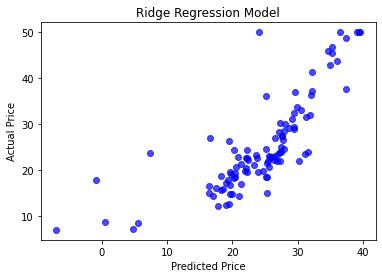

In [81]:
# alpha helps to show overlapping data
plt.scatter(y_pred1, y_test, alpha = 0.7, color = 'b')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Ridge Regression Model')

Lasso Regression 

In [82]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameter = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,35,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameter,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 98.62527782163852, tolerance: 2.573762501547988
  positive)


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 35, 45, 50, 55, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [83]:
y_pred2=lasso_regressor.predict(x_test)

In [84]:
y_pred2

array([27.0235459 , 29.09995136, 26.97159167, 27.80575873, 19.51938658,
       20.99462245, 36.28464495, 16.88004968, 20.48456012, 37.18262398,
       21.95788347, 27.42772219, 25.02871865, 31.72598719, 30.49131555,
       37.22589897, 27.86819181, 19.37068108, 23.5595342 , 21.2706662 ,
       32.03813437, 19.52671925, 24.96486655, 27.40506303, 32.08026117,
       22.29419781, 16.70945999, 19.89517059, 34.61832346, -0.69509041,
       27.37256308, 31.18154399, 25.80013972, 25.1368604 , 19.58539163,
       20.12329949,  5.66766042, 32.15604409, 27.23432528, 26.77055493,
       35.05033673, 27.93405269, 17.83153919, 28.71512791, 16.46571105,
       27.40321825, 21.85201123, 21.32300731, 35.10724993, 18.33086341,
       22.07178913, 18.9529617 , 22.20242617, 35.83462109, 29.97386316,
       29.64177175, 20.27776544, 22.15325898, 17.50938788, 25.36353295,
       23.87008977, 23.28912054, 38.86369014, 39.31641699, 29.34661759,
       19.1938386 , 26.07455651,  0.68782208, 29.3144364 , 34.98

In [85]:
print_evaluate(y_test,y_pred2)

MAE: 4.566231954359893
MSE: 41.00565498252483
RMSE: 6.413117141536354
R2 Square 0.6067337991893123


In [86]:
mean_absolute_percentage_error(y_test, y_pred2)

20.458932097152022

Text(0.5, 1.0, 'Lasso Regression Model')

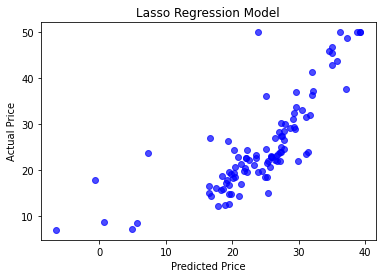

In [87]:
# alpha helps to show overlapping data
plt.scatter(y_pred2, y_test, alpha = 0.7, color = 'b')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Lasso Regression Model')

polynominal regression

In [88]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=10)
pol_reg = LinearRegression()
pol_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [89]:
y_pred3=pol_reg.predict(x_test)

In [90]:
 y_pred3

array([27.1526302 , 29.09313231, 26.891681  , 27.65581775, 19.59706929,
       21.06564611, 36.59378593, 16.94619659, 20.49241538, 37.48153695,
       22.09126538, 27.57733085, 25.15450977, 31.84813862, 30.57095794,
       37.60310745, 27.8700036 , 19.40126033, 23.61321488, 21.40520576,
       32.29030983, 19.58712138, 25.11709635, 27.44064426, 32.10328797,
       22.23446737, 16.59879472, 19.89558468, 34.76344505, -1.00847782,
       27.31697314, 31.37976301, 25.62157084, 25.08965374, 19.66170351,
       20.17557054,  5.5392909 , 32.25481419, 27.35933405, 26.8982319 ,
       35.30240602, 28.0668805 , 17.8696767 , 28.69139253, 16.35668439,
       27.40660198, 21.93721454, 21.28963534, 35.2981071 , 18.29105196,
       22.14127104, 19.04272073, 22.23291819, 36.09719093, 30.18817476,
       29.89542446, 20.33530211, 22.21210356, 17.47585478, 25.404058  ,
       24.00739493, 23.39918688, 39.24290466, 39.75515615, 29.49689809,
       19.33394536, 26.04710935,  0.3528751 , 29.48161464, 34.96

In [91]:
print_evaluate(y_test,y_pred3)

MAE: 4.55364548025579
MSE: 41.00565498252483
RMSE: 6.403565802154674
R2 Square 0.6079043444068188


In [92]:
mean_absolute_percentage_error(y_test, y_pred3)

20.630765531909912

Text(0.5, 1.0, 'Polynomial Regression')

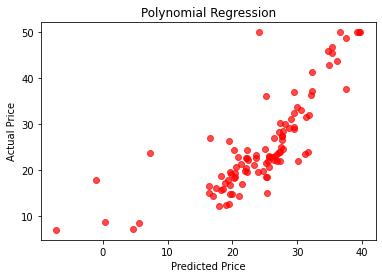

In [93]:
# alpha helps to show overlapping data
plt.scatter(y_pred3, y_test, alpha = 0.7, color = 'r')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Polynomial Regression')

Decision Tree Regression

In [94]:
 from sklearn.tree import DecisionTreeRegressor
 regressor = DecisionTreeRegressor(random_state=0,max_depth=2)
 regressor.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [95]:
y_pred5= regressor.predict(x_test)

In [96]:
y_pred5

array([23.24676617, 23.24676617, 23.24676617, 23.24676617, 23.24676617,
       14.86143791, 44.30526316, 14.86143791, 23.24676617, 44.30526316,
       23.24676617, 23.24676617, 23.24676617, 23.24676617, 23.24676617,
       44.30526316, 23.24676617, 23.24676617, 23.24676617, 14.86143791,
       23.24676617, 14.86143791, 23.24676617, 23.24676617, 33.41612903,
       23.24676617, 14.86143791, 14.86143791, 44.30526316, 14.86143791,
       33.41612903, 33.41612903, 23.24676617, 23.24676617, 14.86143791,
       23.24676617, 14.86143791, 33.41612903, 23.24676617, 23.24676617,
       44.30526316, 23.24676617, 14.86143791, 23.24676617, 14.86143791,
       23.24676617, 23.24676617, 23.24676617, 44.30526316, 14.86143791,
       23.24676617, 14.86143791, 23.24676617, 44.30526316, 23.24676617,
       33.41612903, 23.24676617, 23.24676617, 23.24676617, 33.41612903,
       23.24676617, 23.24676617, 44.30526316, 44.30526316, 23.24676617,
       14.86143791, 23.24676617, 14.86143791, 23.24676617, 44.30

In [97]:
print_evaluate(y_test,y_pred5)

MAE: 4.175840953796126
MSE: 41.00565498252483
RMSE: 5.999791922295812
R2 Square 0.655792241631554


In [98]:
mean_absolute_percentage_error(y_test, y_pred5)

18.736892724132804

Text(0.5, 1.0, 'Decision Tree')

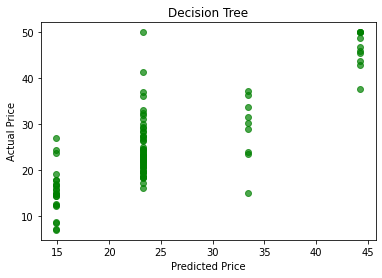

In [99]:
 #alpha helps to show overlapping data
plt.scatter(y_pred5, y_test, alpha = 0.7, color = 'g')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Decision Tree')

Random forest Regression

In [100]:
 from sklearn.ensemble import RandomForestRegressor
 from sklearn.datasets import make_regression
 rf = RandomForestRegressor(max_depth=2, random_state=0)
 rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [101]:
y_pred6= rf.predict(x_test)

In [102]:
y_pred6

array([22.54362264, 26.71085901, 25.85772979, 27.48728754, 21.56174383,
       16.29140583, 42.71857493, 15.13007575, 21.70329965, 43.39565217,
       21.70329965, 23.58378053, 22.54362264, 31.16721036, 29.60694004,
       37.13721718, 25.53189187, 21.70329965, 22.02346772, 16.51600734,
       28.14577729, 15.19995319, 21.93802706, 25.32707141, 37.41249136,
       22.27288834, 15.10138021, 16.14936517, 42.98745747, 14.30614408,
       27.88719291, 31.55399194, 25.32707141, 25.178022  , 15.27163157,
       21.70329965, 14.30614408, 36.9323583 , 25.32707141, 22.54362264,
       42.32625995, 24.20791517, 14.44775645, 26.93283982, 15.32109007,
       25.8057876 , 21.60512985, 21.41970318, 42.73445466, 16.1170868 ,
       21.83648387, 14.91036589, 21.83648387, 42.91551912, 26.28989973,
       27.68821832, 21.70329965, 21.83648387, 21.83648387, 26.23568163,
       21.83648387, 21.83648387, 43.0296354 , 37.13721718, 25.32707141,
       15.17953425, 25.32707141, 14.30614408, 25.32707141, 42.91

In [103]:
print_evaluate(y_test,y_pred6)

MAE: 3.806677424747405
MSE: 41.00565498252483
RMSE: 5.524908718758318
R2 Square 0.7081239291306527


In [104]:
mean_absolute_percentage_error(y_test, y_pred6)

16.591320066212468

Text(0.5, 1.0, 'Random Forest')

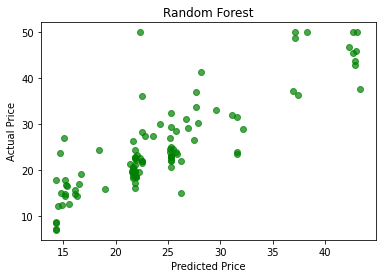

In [105]:
 #alpha helps to show overlapping data
plt.scatter(y_pred6, y_test, alpha = 0.7, color = 'g')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Random Forest')

Random Forest with Hyperparameter Tuning

In [106]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2,3]
# Minimum number of samples required at each leaf node
min_samples_leaf = [3,4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 3], 'min_samples_leaf': [3, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [107]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 3], 'min_samples_leaf': [3, 4], 'bootstrap': [True, False]}


In [108]:
 rf = RandomForestRegressor()

Grid Search CV

In [ ]:
#from sklearn.model_selection import GridSearchCV
#rf_Grid = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 4, verbose=2, n_jobs = 2)

In [ ]:
rf_Grid.fit(x_train,y_train)

Fitting 4 folds for each of 1920 candidates, totalling 7680 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:  1.0min
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:  4.3min
[Parallel(n_jobs=2)]: Done 361 tasks      | elapsed:  9.2min
[Parallel(n_jobs=2)]: Done 644 tasks      | elapsed: 16.1min
[Parallel(n_jobs=2)]: Done 1009 tasks      | elapsed: 25.2min
[Parallel(n_jobs=2)]: Done 1454 tasks      | elapsed: 36.3min
[Parallel(n_jobs=2)]: Done 1981 tasks      | elapsed: 49.9min
[Parallel(n_jobs=2)]: Done 2588 tasks      | elapsed: 65.4min
[Parallel(n_jobs=2)]: Done 3277 tasks      | elapsed: 82.6min
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed: 101.8min
[Parallel(n_jobs=2)]: Done 4897 tasks      | elapsed: 121.4min
[Parallel(n_jobs=2)]: Done 5828 tasks      | elapsed: 142.3min
[Parallel(n_jobs=2)]: Done 6841 tasks      | elapsed: 165.5min
[Parallel(n_jobs=2)]: Done 7680 out of 7680 | elapsed: 184.3min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, rand...
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=2,
     

In [ ]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 200}

In [ ]:
print (f'Train Accuracy - : {rf_Grid.score(x_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_Grid.score(x_test,y_test):.3f}')

Train Accuracy - : 0.937
Test Accuracy - : 0.660


In [ ]:
 from sklearn.ensemble import RandomForestRegressor
 from sklearn.datasets import make_regression
 rf1 = RandomForestRegressor(bootstrap= True,max_depth=10,max_features= 'sqrt',min_samples_leaf=3,min_samples_split= 3, n_estimators=200)
 rf1.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=3, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred6a= rf1.predict(x_test)

In [ ]:
y_pred6a

array([24.66402929, 29.13150471, 26.8697981 , 28.77171937, 20.65882349,
       17.12491541, 44.31158117, 15.85060258, 20.88958427, 45.7971987 ,
       20.84528835, 26.17563248, 22.19313888, 33.56630637, 32.2209789 ,
       39.32969364, 25.35442872, 20.52577125, 20.82462985, 16.85004994,
       33.04342787, 16.09548101, 21.88735585, 24.42254916, 37.05532994,
       19.80136939, 18.40334379, 16.56689783, 44.5391015 ,  9.8342564 ,
       30.87662181, 33.5017706 , 24.37309468, 23.75421276, 15.90374863,
       20.44325756,  8.95600074, 37.58553983, 24.94278613, 22.60351349,
       43.73593931, 25.70156504, 11.64022997, 29.47615119, 18.81491364,
       26.6899758 , 20.41700493, 20.79522451, 46.08963734, 17.45901476,
       20.87993979, 15.2721862 , 20.58192388, 45.71711598, 29.20832633,
       32.37275659, 20.50488357, 20.59068583, 20.51312668, 25.92639222,
       20.48278961, 21.14926058, 44.6735443 , 38.6242676 , 26.52709471,
       16.07660893, 23.31805618, 10.28068398, 26.44227077, 42.71

In [ ]:
print_evaluate(y_test,y_pred6a)

MAE: 3.106822220273721
MSE: 41.00565498252483
RMSE: 4.669620519349674
R2 Square 0.7914974098225855


In [ ]:
mean_absolute_percentage_error(y_test, y_pred6a)

12.587561741210376

Text(0.5, 1.0, 'Random Forest')

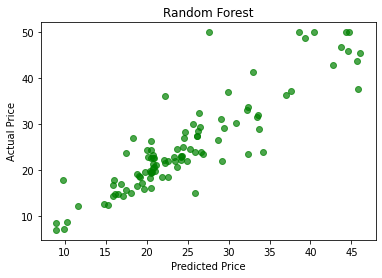

In [ ]:
 #alpha helps to show overlapping data
plt.scatter(y_pred6a, y_test, alpha = 0.7, color = 'g')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Random Forest')

Random search CV

In [110]:
 rf_model = RandomForestRegressor()

In [113]:
from sklearn.model_selection import RandomizedSearchCV
rf_RandomGrid = RandomizedSearchCV(estimator = rf_model, param_distributions = param_grid,cv = 4,verbose=2, n_jobs = 2)

In [115]:
rf_RandomGrid.fit(x_train,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:   47.9s
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:   48.9s finished


RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [116]:
rf_RandomGrid.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 600}

In [117]:
print (f'Train Accuracy - : {rf_RandomGrid.score(x_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_RandomGrid.score(x_test,y_test):.3f}')

Train Accuracy - : 0.930
Test Accuracy - : 0.787


In [120]:
 from sklearn.ensemble import RandomForestRegressor
 from sklearn.datasets import make_regression
 rf2 = RandomForestRegressor(bootstrap = True,max_depth = 80, max_features = 'auto' ,min_samples_leaf = 3, min_samples_split= 2, n_estimators = 600)
 rf2.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=80, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=600, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [123]:
y_pred6b= rf2.predict(x_test)

In [124]:
y_pred6a

array([24.68140479, 29.55622425, 26.05972855, 29.23504059, 20.87811783,
       17.10169447, 45.06229868, 15.36575496, 20.97928185, 47.0301377 ,
       21.01210467, 26.09966655, 22.63005241, 33.33319389, 31.59838748,
       39.22848528, 25.50820314, 20.3630322 , 20.55300817, 16.68655428,
       33.87245081, 15.63839897, 22.08543111, 24.74843196, 36.56583156,
       19.71686319, 18.97345834, 16.17677178, 44.31132658,  9.5106336 ,
       31.59765354, 32.79904602, 24.36053153, 23.59571887, 15.45285996,
       20.4025895 ,  8.47743646, 36.98500371, 24.51657562, 22.24044854,
       43.51392418, 25.26620454, 11.60351918, 29.10503457, 19.16410996,
       26.67409019, 20.77765397, 20.82816885, 47.32288089, 17.25486961,
       20.56959247, 15.03044934, 20.59714886, 47.19853541, 30.25416844,
       32.98010994, 20.32346404, 20.91287742, 20.64675784, 28.42629203,
       20.55642753, 20.8364096 , 46.34820381, 38.93841616, 26.27308897,
       15.39152168, 23.37643936, 10.60441841, 26.13100253, 44.37

In [126]:
print_evaluate(y_test,y_pred6b)

MAE: 3.1477301587373607
MSE: 41.00565498252483
RMSE: 4.708146721641007
R2 Square 0.788042760835969


In [127]:
mean_absolute_percentage_error(y_test, y_pred6b)

12.824466688277816

Text(0.5, 1.0, 'Random forest(Random search CV)')

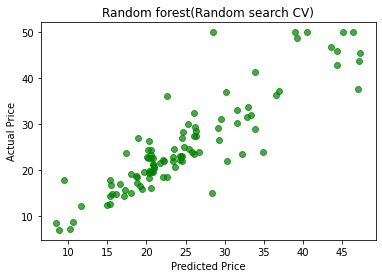

In [125]:
plt.scatter(y_pred6b, y_test, alpha = 0.7, color = 'g')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Random forest(Random search CV)')

Extreme Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
GradientRegressor = GradientBoostingRegressor(random_state=0,max_depth=2)
model=GradientRegressor.fit(x_train, y_train)

In [ ]:
y_pred7= model.predict(x_test)

In [ ]:
y_pred7

array([24.25879701, 26.83909058, 25.44194434, 27.76252485, 19.92764541,
       18.51428119, 46.60205106, 16.00223484, 21.27807917, 47.98868361,
       21.42144815, 25.52341074, 22.55384495, 32.32356365, 30.97502481,
       37.58774578, 24.56950517, 21.27807917, 21.18840581, 16.76129836,
       33.90521433, 15.88017719, 21.8703768 , 24.40606866, 37.85929366,
       21.21277734, 17.11563571, 16.13969459, 43.21633381,  8.15362076,
       30.21916706, 33.689765  , 23.84044056, 24.40606866, 17.1869291 ,
       21.27807917,  9.86325857, 38.46402453, 24.41363226, 22.66520986,
       43.6185255 , 24.32956966, 12.92020276, 28.61246274, 17.18563274,
       27.28038495, 21.1869263 , 17.40028553, 47.09938252, 16.77411322,
       20.96035505, 14.56942869, 21.27807917, 47.07237341, 27.89650266,
       32.1065666 , 21.27807917, 20.80763179, 20.66426281, 27.76811385,
       21.1869263 , 21.80074266, 46.25652674, 31.29486295, 24.93321862,
       16.37398135, 23.88340517,  9.84952605, 26.09956868, 45.75

In [ ]:
print_evaluate(y_test,y_pred7)

MAE: 3.288396645409014
MSE: 41.00565498252483
RMSE: 4.787890216667042
R2 Square 0.7808019710619213


In [ ]:
mean_absolute_percentage_error(y_test, y_pred7)

13.192416028066178

Text(0.5, 1.0, 'Gradient Boosting Regressor')

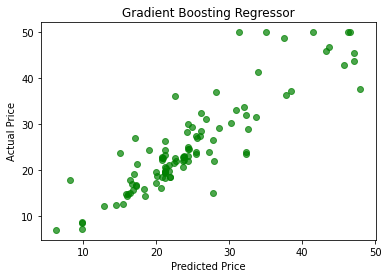

In [ ]:
plt.scatter(y_pred7, y_test, alpha = 0.7, color = 'g')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Gradient Boosting Regressor')

Light Gradient Boosting

In [129]:
import lightgbm as lgb
from lightgbm import LGBMRegressor
model = LGBMRegressor()
model.fit(x_train,y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [130]:
y_pred8=model.predict(x_test)

In [131]:
y_pred8

array([25.48555053, 29.13959814, 27.44653238, 26.57632644, 19.93479951,
       16.90799009, 46.73901429, 16.09147448, 22.53629355, 45.70515664,
       21.8230936 , 25.42052081, 20.87889153, 33.64046703, 31.06195621,
       39.43624515, 24.57687192, 22.13208739, 20.76632514, 15.34364512,
       30.26702869, 15.28635572, 21.68584247, 23.31729013, 37.09488181,
       19.27122142, 19.3866943 , 15.13730528, 47.06891894,  8.07268385,
       31.56631548, 31.56651831, 23.39568328, 24.01074636, 15.65177292,
       22.76741805,  8.93502431, 39.08766511, 22.30533389, 22.41691118,
       45.70515664, 25.00330556, 11.19495218, 28.93604076, 19.74756479,
       25.75455105, 21.38532291, 20.24801615, 46.84406373, 16.84691773,
       21.1391708 , 14.56670047, 19.44503651, 46.83570103, 29.40785612,
       33.9569863 , 21.67740184, 20.20451445, 18.25888594, 30.9991661 ,
       19.52839032, 20.84405634, 46.73901429, 38.29285527, 25.26264994,
       15.51917692, 22.88105754, 10.01615033, 24.60479063, 44.78

In [132]:
print_evaluate(y_test,y_pred8)

MAE: 3.0297504793136882
MSE: 41.00565498252483
RMSE: 4.693078560817465
R2 Square 0.7893973044206979


In [133]:
mean_absolute_percentage_error(y_test, y_pred8)

12.301477378090937

Text(0.5, 1.0, 'Light Gradient Boosting')

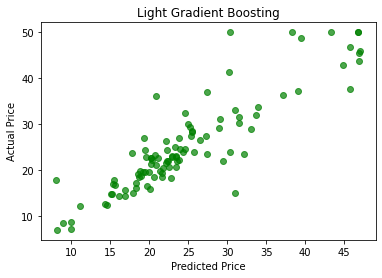

In [134]:
plt.scatter(y_pred8, y_test, alpha = 0.7, color = 'g')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Light Gradient Boosting')

In [136]:
import xgboost as xg
# Train and test set are converted to DMatrix objects,
# as it is required by learning API.
train_dmatrix = xg.DMatrix(data = x_train, label = y_train)
test_dmatrix = xg.DMatrix(data = x_test, label = y_test)
  
# Parameter dictionary specifying base learner
param = {"booster":"gblinear", "objective":"reg:linear"}
  
xgb_r = xg.train(params = param, dtrain = train_dmatrix, num_boost_round = 10)
pred = xgb_r.predict(test_dmatrix)

[06:22:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [137]:
y_pred9 = xgb_r.predict(test_dmatrix)

In [138]:
y_pred9

array([24.367504  , 28.149221  , 26.728107  , 30.292446  , 17.367878  ,
       20.032204  , 28.09692   , 17.234964  , 21.044416  , 30.773346  ,
       20.337164  , 24.85691   , 21.99392   , 27.44461   , 27.473024  ,
       30.593233  , 26.213955  , 19.16113   , 22.080088  , 19.568224  ,
       25.379604  , 18.973614  , 21.852806  , 25.344946  , 30.239485  ,
       22.86264   , 21.946005  , 19.50831   , 30.928247  ,  5.892625  ,
       29.071732  , 26.808594  , 28.486784  , 25.036396  , 19.664228  ,
       19.69761   , 11.711419  , 28.953173  , 22.74436   , 23.616241  ,
       29.443796  , 24.55801   , 17.618444  , 27.631584  , 21.331583  ,
       26.850958  , 20.215721  , 18.306     , 30.972351  , 20.587208  ,
       19.869875  , 18.563044  , 21.533844  , 30.136883  , 24.921885  ,
       25.25789   , 19.530056  , 20.210941  , 16.492493  , 20.643497  ,
       21.448006  , 21.501745  , 30.932447  , 31.511759  , 24.904354  ,
       18.850727  , 24.727474  ,  5.661318  , 24.656279  , 35.60

In [139]:
print_evaluate(y_test,y_pred9)

MAE: 5.344909282759124
MSE: 41.00565498252483
RMSE: 7.606381008360206
R2 Square 0.44677164845263295


In [140]:
mean_absolute_percentage_error(y_test, y_pred9)

20.79823201704757

Text(0.5, 1.0, 'Xgboost Regression')

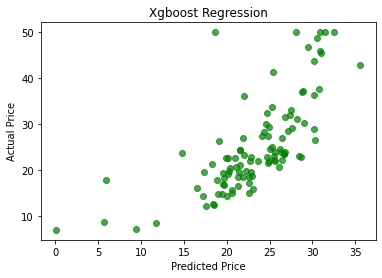

In [142]:
plt.scatter(y_pred9, y_test, alpha = 0.7, color = 'g')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Xgboost Regression')

SVM Regression

In [143]:
from sklearn import svm
svm_reg=svm.SVR()
svm_reg.fit(x_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [144]:
y_pred10=svm_reg.predict(x_test)

In [145]:
y_pred10

array([25.83016272, 28.82626277, 24.83204111, 27.07228313, 19.12600187,
       17.61820364, 33.95395422, 16.23975464, 18.91957619, 36.65479249,
       19.58219805, 26.55696256, 22.96640551, 31.22817347, 30.27928453,
       34.47718261, 26.38235036, 18.4099401 , 21.58920878, 18.65290347,
       30.32844413, 15.99232455, 22.77993388, 26.02324532, 32.20680978,
       20.3882907 , 17.72386621, 16.79674196, 35.88577626, 13.37141966,
       28.16397091, 31.41310453, 24.63612017, 23.35794905, 16.02760665,
       18.60719789, 12.25476629, 32.85750687, 25.01142361, 25.12143225,
       35.64361367, 26.8394182 , 13.77175873, 27.59741037, 17.33493864,
       27.08252398, 19.09575476, 17.9620475 , 36.51796982, 17.43920904,
       20.17274336, 15.17184365, 20.33096182, 36.30988837, 28.70749109,
       28.21899837, 18.86662095, 19.77275087, 18.87836055, 20.71783233,
       21.4501257 , 21.14000607, 35.16590234, 33.50365817, 27.95472065,
       16.59849901, 23.58083717, 13.29385907, 27.86400677, 31.35

In [146]:
print_evaluate(y_test,y_pred10)

MAE: 4.099503429070402
MSE: 41.00565498252483
RMSE: 6.116939967185447
R2 Square 0.642219461301154


In [147]:
mean_absolute_percentage_error(y_test, y_pred10)

16.243296904329313

Text(0.5, 1.0, 'SVM')

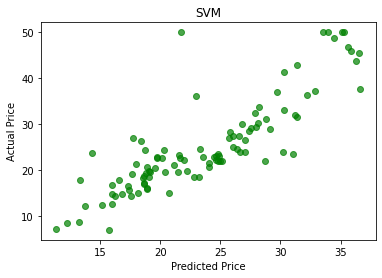

In [148]:
plt.scatter(y_pred10, y_test, alpha = 0.7, color = 'g')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('SVM')